# Multiple Linear Regression

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data set
housing = fetch_california_housing()

# Split into X, y in training and testing
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Create model and fit it to the training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate and print errors
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")

rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.5888
Mean squared error: 0.5389
Root mean squared error: 0.7341


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the correlation matrix
corr_matrix = X.corr()

# Identify pairs of features with high collinearity (correlation > 0.8 or < -0.8)
high_corr_features = [(col1, col2, corr_matrix.loc[col1, col2])
                      for col1 in corr_matrix.columns
                      for col2 in corr_matrix.columns
                      if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.8]

# Convert to a DataFrame for better visualisation
collinearity_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2", "Correlation"])
print("\nHighly Correlated Features:\n", collinearity_df)

# Compute Variance Inflation Factor (VIF) for each feature.
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]

# Print VIF values
print("\nVariance Inflation Factor (VIF) for each feature:\n", vif_data)


Highly Correlated Features:
    Feature 1  Feature 2  Correlation
0   AveRooms  AveBedrms     0.847621
1  AveBedrms   AveRooms     0.847621
2   Latitude  Longitude    -0.924664
3  Longitude   Latitude    -0.924664

Variance Inflation Factor (VIF) for each feature:
       Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [22]:
# Split into X, y in training and testing
X = pd.DataFrame(housing.data, columns=housing.feature_names).drop(columns=["AveBedrms"])
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Create model and fit it to the training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate and print errors
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")

rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.5864
Mean squared error: 0.5420
Root mean squared error: 0.7362


### Understanding regression coefficients

In [23]:
print("Intercept: ", model.intercept_)

coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nFeature Coefficients:\n", coef_df)

Intercept:  2.0719469373788777

Feature Coefficients:
       Feature  Coefficient
0      MedInc     0.708260
1    HouseAge     0.123406
2    AveRooms     0.045637
3  Population    -0.003305
4    AveOccup    -0.037483
5    Latitude    -0.978290
6   Longitude    -0.931742


### Summarising model results

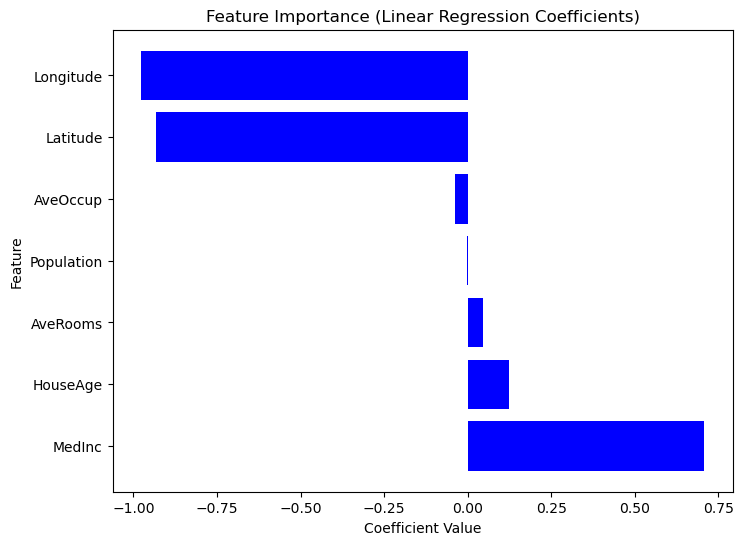

In [24]:
# Sort dataframe by coefficients
coef_df_sorted = coef_df.sort_values(by="Coefficient", ascending=False)

# Create plot
plt.figure(figsize=(8,6))
plt.barh(coef_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

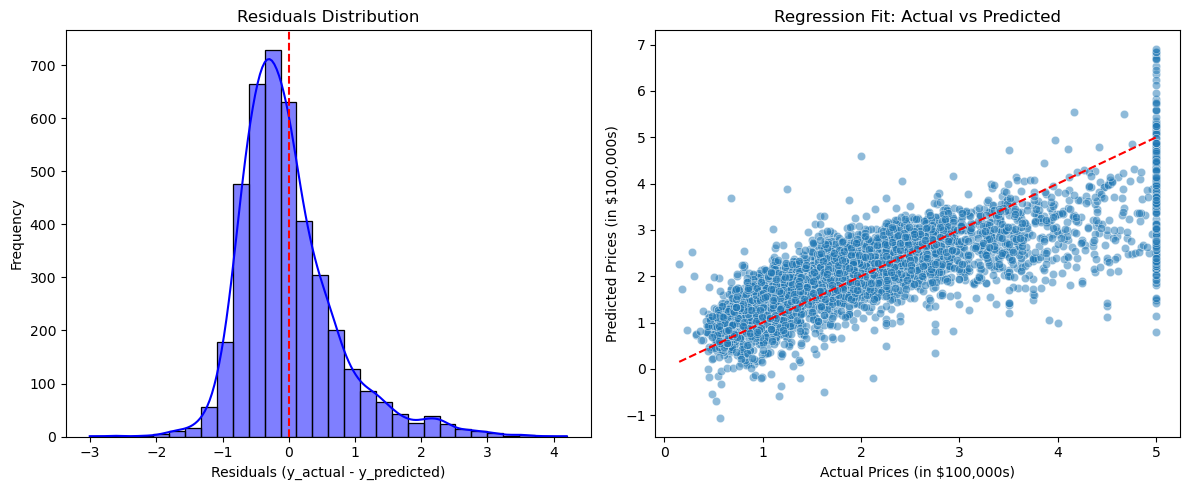

In [25]:
# Compute residuals
residuals = y_test - y_pred

# Create plots
plt.figure(figsize=(12,5))

# Plot 1: Residuals Distribution
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")

# Plot 2: Regression Fit (Actual vs Predicted)
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Prices (in $100,000s)")
plt.ylabel("Predicted Prices (in $100,000s)")

# Show plots
plt.tight_layout()
plt.show()


## Reference
https://www.datacamp.com/tutorial/sklearn-linear-regression